Let's investigate the dataset on case law verdicts a little bit to get an overview about where we are.

The cases and the references are saved in different files, following the naming convenction `COURT-full-nodes`and `COURT-full-edges` where three different courts exist: cjeu, echr and ussc.

To examine the network I want to use the tools included in the networkx package so I load the files in and construct a directed graph based on the data

In [1]:
import networkx as nx
import pickle
import pandas as pd
import sys

# Script for generating networkx graphs from a given dataset or loading them from pickled versions if they already exist
all_courts = ['cjeu', 'echr', 'ussc']
chosen_court = 'cjeu'

with open('Data/'+chosen_court + '-full-nodes.csv') as f:
	nodes = pd.read_csv(f, sep=' ').transpose()

with open('Data/'+chosen_court+'-full-edges.csv') as f:
	edges = pd.read_csv(f, sep=' ')

G = nx.DiGraph()

# Add all the nodes from the CSV file, using their node id as identifier including all metadata except the node_id which is already used
G.add_nodes_from([(v['node_id'], {k: vv for (k,vv) in v.iteritems() if k != 'node_id'}) for v in nodes.to_dict().itervalues()])
G.add_edges_from([(edge[1]['source_id'], edge[1]['target_id']) for edge in edges.iterrows()])

In [17]:
print 'Number of nodes in G: {}'.format(len(G))
print 'Number of edges in G: {}'.format(len(G.edges()))

Number of nodes in G: 9646
Number of edges in G: 43787


The degree distribution can tell me a bit about the structure of the graph when plotted.

In [15]:
import matplotlib.pyplot as plt
from collections import *
%matplotlib inline

def plotLogDegree(graph):
	d_in = Counter(G.in_degree())
	y_in = Counter(d_in.values()).values()
	x_in = sorted(set(d_in.values()))
	d_out = Counter(G.out_degree())
	y_out = Counter(d_out.values()).values()
	x_out = sorted(set(d_out.values()))
	plt.loglog(x_in,y_in, 'ro-') # Plot the in degree distribution
	plt.loglog(x_out, y_out, 'bv-') # Plot the out degree distribution
	plt.xlabel('Degree')
	plt.ylabel('Number of nodes')
	plt.legend(['In degree', 'Out degree'])
	plt.legend()
	plt.show()

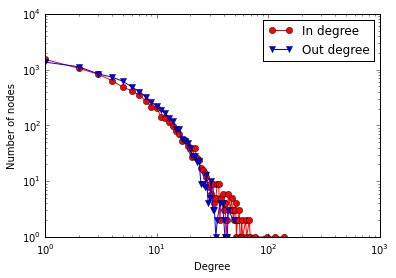

In [18]:
plotLogDegree(G)

The output of the graph is not so log linear that it instantly makes me think BA graph, but neither is it completely off. Time will tell. You'd think preferential attachment would be in effect since judges can only remember so many cases. Poco strane.

The connectivity of the components show that there is a single component with more than 8000 nodes and a bunch of smaller, unconnected components.

In [38]:
components = []
lengths = []
# Find the greatest component from the undirected version of the graph
for component in nx.connected_component_subgraphs(nx.Graph(G)):
    components.append(component)
    lengths.append(len(component))
    print "Length of component: {}".format(len(component))
# Find the GCC as the largest component and then recreate the directed graph
GCC = components[lengths.index(max(lengths))]
GCC = G.subgraph(GCC.nodes())

Length of component: 8574
Length of component: 1
Length of component: 1
Length of component: 3
Length of component: 1
Length of component: 2
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 2
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 2
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 2
Length of component: 1
Length of component: 2
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length of component: 1
Length o

It is possible that the GCC is closer to a BA graph than the full network. But in the this case it seems exactly the same

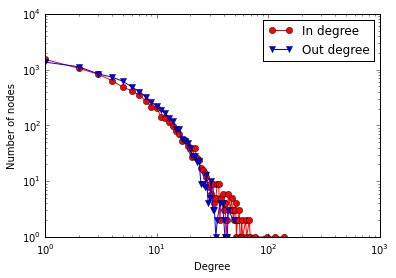

In [45]:
plotLogDegree(GCC)